##Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
!pip install rdkit-pypi
!pip install standardizer
import json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 13.9 MB/s eta 0:00:00


##Reading the csv mentioned in the paper. Took the data from **deepherg** repository.

Link: https://github.com/ChengF-Lab/deephERG/blob/master/Table%20S6.xlsx


In [ ]:
#enter the path as '../data/TableS6.xlsx'
df = pd.read_excel('/content/TableS6.xlsx')

In [ ]:
df.head()

,"Table S6. Detailed predictions for 1,824 approved drugs by deephERG",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification
1,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.165396,0.834604,1
2,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.685339,0.314661,0
3,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.148685,0.851315,1
4,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.875724,0.124276,0


In [ ]:
# Set the first row as column names
df.columns = df.iloc[0]
df = df.iloc[1:]

In [ ]:
df.head()

,DrugBank ID,Smiles,Name,Predicted negative probability,Predicted positive probability,Predicted classification
1,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,Venetoclax,0.165396,0.834604,1
2,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,Grazoprevir,0.685339,0.314661,0
3,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,Elbasvir,0.148685,0.851315,1
4,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,Lesinurad,0.875724,0.124276,0
5,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,Cefroxadine,0.996768,0.003232,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 1 to 1824
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   DrugBank ID                     1824 non-null   object
 1   Smiles                          1824 non-null   object
 2   Name                            1824 non-null   object
 3   Predicted negative probability  1823 non-null   object
 4   Predicted positive probability  1823 non-null   object
 5   Predicted classification        1824 non-null   object
dtypes: object(6)
memory usage: 85.6+ KB


In [ ]:
df.shape

(1824, 6)

##Finding number of blockers and non-blockers in the data mentioned in the paper

In [ ]:
# Count the occurrences of each category
category_counts = df['Predicted classification'].value_counts()

# Calculate the percentage of each category
total_samples = len(df)
percent_blocker = (category_counts[1] / total_samples) * 100
percent_non_blocker = (category_counts[0] / total_samples) * 100

# Display the counts and percentages
print("Counts:")
print("Blocker (1):", category_counts[1])
print("Non-Blocker (0):", category_counts[0])
print("\nPercentages:")
print("Blocker (1): {:.2f}%".format(percent_blocker))
print("Non-Blocker (0): {:.2f}%".format(percent_non_blocker))


Counts:
Blocker (1): 540
Non-Blocker (0): 1284

Percentages:
Blocker (1): 29.61%
Non-Blocker (0): 70.39%


###Visualising

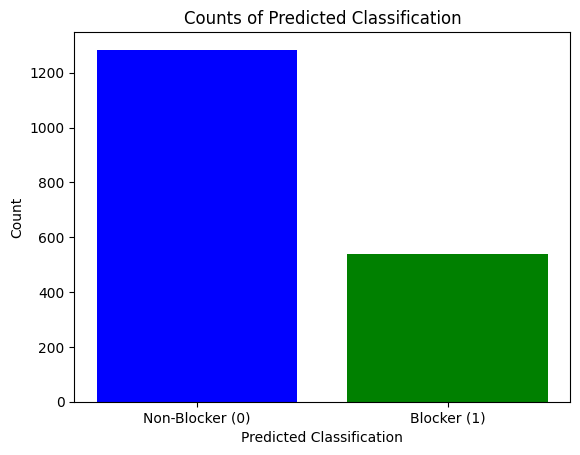

In [ ]:
# Create a bar plot
plt.bar(category_counts.index, category_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Predicted Classification')
plt.ylabel('Count')
plt.title('Counts of Predicted Classification')
plt.xticks(category_counts.index, ['Non-Blocker (0)', 'Blocker (1)'])

# Display the plot
plt.show()

##Creating a new dataframe

In [ ]:
# Create a separate DataFrame with only 'Name' and 'Smiles' columns
input_df_task2 = df[['Name', 'Smiles']].copy()

# Display the new DataFrame
input_df_task2.head()

,Name,Smiles
1,Venetoclax,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...
2,Grazoprevir,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...
3,Elbasvir,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...
4,Lesinurad,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1
5,Cefroxadine,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...


In [ ]:
# Save the input DataFrame locally
input_df_task2.to_csv('input_df_task2.csv', index=False)

In [ ]:
# downloading the csv
# from google.colab import files
# files.download('/content/input_df_task2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create a separate DataFrame with only 'Smiles' columns
task2 = df[['Smiles']].copy()

# Display the new DataFrame
task2.head()

,Smiles
1,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...
2,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...
3,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...
4,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1
5,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...


In [ ]:
# Save the input DataFrame locally
task2.to_csv('task2.csv', index=False)

In [ ]:
# downloading the csv
# from google.colab import files
# files.download('/content/task2.csv')

In [54]:
from rdkit import Chem
from standardiser import standardise
from rdkit.Chem import inchi



def standardise_smiles(smiles):
    mols = []
    for smi in smiles:
        try:
            mol = Chem.MolFromSmiles(smi)
        except:
            mol=np.nan
        mols += [mol]
    st_mols = []
    for mol in mols:
        if mol is not None:
            try:
                st_mol = standardise.run(mol)
            except:
                st_mol = np.nan
        else:
            st_mol = np.nan
        st_mols += [st_mol]
    st_smiles = []
    for st_mol in st_mols:
        if st_mol is not None:
            try:
                st_smi = Chem.MolToSmiles(st_mol)
            except:
                st_smi=np.nan
        else:
            st_smi = np.nan
        st_smiles += [st_smi]
    return st_smiles

def standardise_inchikey(inchikeys):
    st_inchikeys = []
    for inchikey in inchikeys:
        if inchikey:
            st_inchikey = inchikey.strip().upper()
        else:

            st_inchikey = np.nan
        st_inchikeys.append(st_inchikey)
    return st_inchikeys

##Standardizing the Smiles

In [ ]:
# Standardising the smiles
#uncomment the following line
#from src.preprocessing import standardise_smiles
smiles_list = input_df_task2['Smiles'].tolist()
standardised_smiles_list = standardise_smiles(smiles_list)
input_df_task2['Standardised_smiles'] = standardised_smiles_list
input_df_task2.head()

[12:48:45] Can't kekulize mol.  Unkekulized atoms: 3 10
[24/03/24 12:48:45 standardiser.neutralise WARNING] zwitterion with more negative charges than quaternary positive centres detected
[12:48:50] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 7 9
[12:48:53] Can't kekulize mol.  Unkekulized atoms: 0 1 3 4 8 10


,Name,Smiles,Standardised_smiles
1,Venetoclax,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...
2,Grazoprevir,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...
3,Elbasvir,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...
4,Lesinurad,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12
5,Cefroxadine,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...


In [ ]:
input_df_task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 1 to 1824
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 1824 non-null   object
 1   Smiles               1824 non-null   object
 2   Standardised_smiles  1727 non-null   object
dtypes: object(3)
memory usage: 42.9+ KB


In above cell we see there are some null entries in the Standardized_smiles column

In [ ]:
# Create a separate DataFrame with only 'Standardised_smiles' columns
task2_new = input_df_task2[['Standardised_smiles']].copy()

# Display the new DataFrame
task2_new.head()

,Standardised_smiles
1,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...
2,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...
3,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...
4,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12
5,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...


In [ ]:
# Save the input DataFrame locally
task2_new.to_csv('task2_new.csv', index=False)

In [ ]:
# downloading the csv
# from google.colab import files
# files.download('/content/task2_new.csv')

##Ran the Ersilia Model Hub model on the task_new.csv containing standardized smiles.

##Loading the json file in which the predictions are stored.

In [ ]:
# Load JSON data
# replace the path with '../data/task2_new_output.json'
with open('/content/task2_new_output.json', 'r') as f:
    predicted_task2_json = json.load(f)


In [ ]:
# Extract 'key', 'input', and 'outcome' values
keys = [item['input']['key'] for item in predicted_task2_json]
inputs = [item['input']['input'] for item in predicted_task2_json]
outcomes = [item['output']['outcome'] for item in predicted_task2_json]

# Create DataFrame with 'key', 'input', and 'outcome' columns
predicted_df = pd.DataFrame({'key': keys, 'Standardized Smiles': inputs, 'outcome': outcomes})

In [ ]:
predicted_df.head()

,key,Standardized Smiles,outcome
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594
1,OBMNJSNZOWALQB-NCQNOWPTSA-N,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637
2,BVAZQCUMNICBAQ-PZHYSIFUSA-N,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485
3,FGQFOYHRJSUHMR-UHFFFAOYSA-N,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208
4,RDMOROXKXONCAL-UEKVPHQBSA-N,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040


In [ ]:
# Save the input DataFrame locally
predicted_df.to_csv('predicted_df_task2.csv', index=False)

In [ ]:
# downloading the predicted+df csv
# from google.colab import files
# files.download('/content/predicted_df_task2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   key                  1824 non-null   object 
 1   Standardized Smiles  1824 non-null   object 
 2   outcome              1727 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.9+ KB


##Renaming the columns

In [ ]:
predicted_df.columns = ['key', 'Standardized Smiles','Predicted positive probability']
predicted_df.head()

,key,Standardized Smiles,Predicted positive probability
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594
1,OBMNJSNZOWALQB-NCQNOWPTSA-N,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637
2,BVAZQCUMNICBAQ-PZHYSIFUSA-N,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485
3,FGQFOYHRJSUHMR-UHFFFAOYSA-N,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208
4,RDMOROXKXONCAL-UEKVPHQBSA-N,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040


##Calculating the negative probabilty

In [ ]:
predicted_df['Predicted negative probability'] = 1 - predicted_df['Predicted positive probability']
predicted_df.head()

,key,Standardized Smiles,Predicted positive probability,Predicted negative probability
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,0.559406
1,OBMNJSNZOWALQB-NCQNOWPTSA-N,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637,0.630363
2,BVAZQCUMNICBAQ-PZHYSIFUSA-N,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485,0.648515
3,FGQFOYHRJSUHMR-UHFFFAOYSA-N,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208,0.670792
4,RDMOROXKXONCAL-UEKVPHQBSA-N,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040,0.878960


##Classifying the molecules based on predicted positive probabilty on predicted_df

In [ ]:
predicted_df['Predicted classification'] = predicted_df['Predicted positive probability'].apply(lambda x: 1 if x >= 0.5 else 0)
predicted_df

,key,Standardized Smiles,Predicted positive probability,Predicted negative probability,Predicted classification
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,0.559406,0
1,OBMNJSNZOWALQB-NCQNOWPTSA-N,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637,0.630363,0
2,BVAZQCUMNICBAQ-PZHYSIFUSA-N,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485,0.648515,0
3,FGQFOYHRJSUHMR-UHFFFAOYSA-N,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208,0.670792,0
4,RDMOROXKXONCAL-UEKVPHQBSA-N,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040,0.878960,0
...,...,...,...,...,...
1819,PMATZTZNYRCHOR-IMVLJIQESA-N,C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C...,0.382343,0.617657,0
1820,SBNPWPIBESPSIF-MHWMIDJBSA-N,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,0.516502,0.483498,1
1821,NFLWUMRGJYTJIN-NXBWRCJVSA-N,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,0.481436,0.518564,0
1822,BLCLNMBMMGCOAS-URPVMXJPSA-N,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,0.494578,0.505422,0


In [ ]:
# Reset index for both DataFrames
predicted_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Merge the DataFrames
predicted_df = pd.merge(predicted_df, df[['DrugBank ID', 'Name', 'Smiles']], left_index=True, right_index=True)


In [ ]:
predicted_df.head()

,key,Standardized Smiles,Predicted positive probability,Predicted negative probability,Predicted classification,DrugBank ID,Name,Smiles
0,LQBVNQSMGBZMKD-UHFFFAOYSA-N,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,0.440594,0.559406,0,DB11581,Venetoclax,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...
1,OBMNJSNZOWALQB-NCQNOWPTSA-N,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,0.369637,0.630363,0,DB11575,Grazoprevir,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...
2,BVAZQCUMNICBAQ-PZHYSIFUSA-N,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,0.351485,0.648515,0,DB11574,Elbasvir,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...
3,FGQFOYHRJSUHMR-UHFFFAOYSA-N,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,0.329208,0.670792,0,DB11560,Lesinurad,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1
4,RDMOROXKXONCAL-UEKVPHQBSA-N,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,0.121040,0.878960,0,DB11367,Cefroxadine,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...


In [ ]:
column_order = ['DrugBank ID', 'Smiles','Standardized Smiles', 'Name', 'Predicted positive probability','Predicted negative probability', 'Predicted classification','key']
predicted_df = predicted_df[column_order]
predicted_df.head()

,DrugBank ID,Smiles,Standardized Smiles,Name,Predicted positive probability,Predicted negative probability,Predicted classification,key
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,Venetoclax,0.440594,0.559406,0,LQBVNQSMGBZMKD-UHFFFAOYSA-N
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,Grazoprevir,0.369637,0.630363,0,OBMNJSNZOWALQB-NCQNOWPTSA-N
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,Elbasvir,0.351485,0.648515,0,BVAZQCUMNICBAQ-PZHYSIFUSA-N
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,Lesinurad,0.329208,0.670792,0,FGQFOYHRJSUHMR-UHFFFAOYSA-N
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,Cefroxadine,0.121040,0.878960,0,RDMOROXKXONCAL-UEKVPHQBSA-N


In [ ]:
predicted_df.shape

(1824, 8)

##Finding number of blockers and non-blockers in the predicted data

In [ ]:
# Count the occurrences of each category
predicted_category_counts = predicted_df['Predicted classification'].value_counts()

# Calculate the percentage of each category
total_samples = len(predicted_df)
predicted_percent_blocker = (predicted_category_counts[1] / total_samples) * 100
predicted_percent_non_blocker = (predicted_category_counts[0] / total_samples) * 100

# Display the counts and percentages
print("Predicted Counts:")
print("Blocker (1):", predicted_category_counts[1])
print("Non-Blocker (0):", predicted_category_counts[0])
print("\nPercentages:")
print("Blocker (1): {:.2f}%".format(predicted_percent_blocker))
print("Non-Blocker (0): {:.2f}%".format(predicted_percent_non_blocker))


Predicted Counts:
Blocker (1): 412
Non-Blocker (0): 1412

Percentages:
Blocker (1): 22.59%
Non-Blocker (0): 77.41%


In [ ]:
# Merge dataframes on key
merged_df = predicted_df.merge(df[['Smiles', 'Predicted classification','Predicted positive probability','Predicted negative probability']], on='Smiles', suffixes=('_predicted', '_actual'))

In [ ]:
merged_df.drop('key', axis = 1, inplace = True)
merged_df.head()

,DrugBank ID,Smiles,Standardized Smiles,Name,Predicted positive probability_predicted,Predicted negative probability_predicted,Predicted classification_predicted,Predicted classification_actual,Predicted positive probability_actual,Predicted negative probability_actual
0,DB11581,Clc1ccc(cc1)C=1CC(CCC=1CN1CCN(CC1)c1cc(Oc2cc3c...,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...,Venetoclax,0.440594,0.559406,0,1,0.834604,0.165396
1,DB11575,S(=O)(=O)(N=C(O)[C@@]1(N=C(O)[C@H]2N3C[C@H](Oc...,C=C[C@@H]1C[C@]1(NC(=O)[C@@H]1C[C@@H]2CN1C(=O)...,Grazoprevir,0.369637,0.630363,0,0,0.314661,0.685339
2,DB11574,O1c2cc(ccc2-c2n(c3c(cc(cc3)-c3nc([nH]c3)[C@H]3...,COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nc(-c2ccc3c(c2...,Elbasvir,0.351485,0.648515,0,1,0.851315,0.148685
3,DB11560,Brc1nnc(SCC(O)=O)n1-c1c2c(cccc2)c(cc1)C1CC1,O=C(O)CSc1nnc(Br)n1-c1ccc(C2CC2)c2ccccc12,Lesinurad,0.329208,0.670792,0,0,0.124276,0.875724
4,DB11367,S1[C@H]2N(C(C(O)=O)=C(OC)C1)C(=O)[C@H]2NC(=O)[...,COC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)C3=C...,Cefroxadine,0.121040,0.878960,0,0,0.003232,0.996768


In [ ]:
merged_df.shape

(1832, 10)

##Removing the duplicate entries

In [ ]:
# Check for duplicate entries in the merged DataFrame
duplicates = merged_df.duplicated()
print("Number of duplicate entries:", duplicates.sum())

# Check for multiple matches for the same "Smiles" value
smiles_counts = merged_df['Smiles'].value_counts()
print("Counts of Smiles values:")
print(smiles_counts[smiles_counts > 1])

Number of duplicate entries: 8
Counts of Smiles values:
O([C@]([C@@H](CN(C)C)C)(Cc1ccccc1)c1ccccc1)C(=O)CC                                                                                                                  4
O1[C@@H](CN)[C@@H](O)[C@H](O)[C@@H](N)[C@H]1O[C@H]1[C@@H](O)[C@@H](O[C@@H]1CO)O[C@H]1[C@H](O[C@H]2O[C@H](CN)[C@@H](O)[C@H](O)[C@H]2N)[C@@H](N)C[C@@H](N)[C@@H]1O    4
OC[C@H]1C[C@@H](n2c3nc(nc(NC4CC4)c3nc2)N)C=C1                                                                                                                       4
S(=O)(C(c1ccccc1)c1ccccc1)CC(=O)N                                                                                                                                   4
Name: Smiles, dtype: int64


In [ ]:
merged_df.drop_duplicates(inplace=True)
merged_df.shape

(1824, 10)

##Finding the mismatch in the classification of molecules

In [ ]:
# Find mismatches in classification
mismatches = merged_df[merged_df['Predicted classification_predicted'] != merged_df['Predicted classification_actual']]

percentages_predicted = (predicted_category_counts / predicted_category_counts.sum()) * 100
percentages_actual = (category_counts / category_counts.sum()) * 100

# Calculate percentage difference
percent_diff = (percentages_predicted - percentages_actual).abs()

# Print insights
print("Insights:")
print("Number of Mismatches in Classification:", len(mismatches))
print("Percentage Difference in Classification:")
print(percent_diff)
print("\n")

Insights:
Number of Mismatches in Classification: 300
Percentage Difference in Classification:
0    7.017544
1    7.017544
Name: Predicted classification, dtype: float64




##Visulaizing the differences in predicted positive probability


In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Predicted Positive Probability', x=merged_df['DrugBank ID'].head(100), y=merged_df['Predicted positive probability_predicted'].head(100), marker_color='blue'),
    go.Bar(name='Actual Positive Probability', x=merged_df['DrugBank ID'].head(100), y=merged_df['Predicted positive probability_actual'].head(100), marker_color='green'),
])

# Update layout
fig.update_layout(barmode='group', title='Predicted and Actual Probabilities for Molecules',
                  xaxis_title='DrugBank ID', yaxis_title='Probability')

# Show plot
fig.show()

###The difference in the predicted positive probability of the paper and Ersilia Model Hub is evident clearly.

##Visulaizing the differences in predicted negative probability

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Predicted Negative Probability', x=merged_df['DrugBank ID'].head(100), y=merged_df['Predicted negative probability_predicted'].head(100), marker_color='purple'),
    go.Bar(name='Actual Negative Probability', x=merged_df['DrugBank ID'].head(100), y=merged_df['Predicted negative probability_actual'].head(100), marker_color='red')
])

# Update layout
fig.update_layout(barmode='group', title='Predicted and Actual Probabilities for Molecules',
                  xaxis_title='DrugBank ID', yaxis_title='Probability')

# Show plot
fig.show()

###The difference in the predicted negative probability of the paper and Ersilia Model Hub is evident clearly.


##Other metrics to analyse the Ersilia Model Hub model predictions wrt actual predictions
###**Recall (Sensitivity):** The recall measures the ability of the model to correctly identify positive instances out of all actual positive instances.

####Recall = True Positives / (True Positives + False Negatives)


---


###**Precision:** Precision measures the proportion of correctly identified positive instances out of all instances that were classified as positive.

####Precision = True Positives / (True Positives + False Positives)

---



###**F1 Score:** The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both precision and recall.

####F1 = 2 * Precision * Recall / (Precision + Recall)

---



In [ ]:
# Calculate True Positives, False Positives, True Negatives, False Negatives
TP = ((merged_df['Predicted classification_predicted'] == 1) & (merged_df['Predicted classification_actual'] == 1)).sum()
FP = ((merged_df['Predicted classification_predicted'] == 1) & (merged_df['Predicted classification_actual'] == 0)).sum()
TN = ((merged_df['Predicted classification_predicted'] == 0) & (merged_df['Predicted classification_actual'] == 0)).sum()
FN = ((merged_df['Predicted classification_predicted'] == 0) & (merged_df['Predicted classification_actual'] == 1)).sum()

# Calculate Recall, Precision, and F1 Score
recall = TP / (TP + FN)
precision = TP / (TP + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1_score)


Recall: 0.6037037037037037
Precision: 0.7912621359223301
F1 Score: 0.6848739495798319


##Insights drawn:
 * The model has recall = 60.37%, this means the model may miss some positive instances, leading to false negatives.

  It may classify blockers as non-blockers that can lead to health issues. Hence higher recall is preferred.

* Precision is decent with 79.13% . This means the model has a relatively low false positive rate.

* A higher F1 score indicates better overall performance. With an F1 score of approximately 68.49%, the model achieves a reasonable balance between precision and recall.


---




In [47]:
predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DrugBank ID                     1824 non-null   object 
 1   Smiles                          1824 non-null   object 
 2   Standardized Smiles             1824 non-null   object 
 3   Name                            1824 non-null   object 
 4   Predicted positive probability  1727 non-null   float64
 5   Predicted negative probability  1727 non-null   float64
 6   Predicted classification        1824 non-null   int64  
 7   key                             1824 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 114.1+ KB


In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 0 to 1831
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   DrugBank ID                               1824 non-null   object 
 1   Smiles                                    1824 non-null   object 
 2   Standardized Smiles                       1824 non-null   object 
 3   Name                                      1824 non-null   object 
 4   Predicted positive probability_predicted  1727 non-null   float64
 5   Predicted negative probability_predicted  1727 non-null   float64
 6   Predicted classification_predicted        1824 non-null   int64  
 7   Predicted classification_actual           1824 non-null   object 
 8   Predicted positive probability_actual     1823 non-null   object 
 9   Predicted negative probability_actual     1823 non-null   object 
dtypes: float64(2), int64(1), object(7)
m

##There are some null values in the merged_df, removing them and then comparing..

In [49]:
cleaned_merged_df = merged_df.dropna()

In [50]:
cleaned_merged_df.shape

(1727, 10)

In [51]:
cleaned_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 1831
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   DrugBank ID                               1727 non-null   object 
 1   Smiles                                    1727 non-null   object 
 2   Standardized Smiles                       1727 non-null   object 
 3   Name                                      1727 non-null   object 
 4   Predicted positive probability_predicted  1727 non-null   float64
 5   Predicted negative probability_predicted  1727 non-null   float64
 6   Predicted classification_predicted        1727 non-null   int64  
 7   Predicted classification_actual           1727 non-null   object 
 8   Predicted positive probability_actual     1727 non-null   object 
 9   Predicted negative probability_actual     1727 non-null   object 
dtypes: float64(2), int64(1), object(7)
m

In [52]:
# Find mismatches in classification
cleaned_merged_mismatches = cleaned_merged_df[cleaned_merged_df['Predicted classification_predicted'] != cleaned_merged_df['Predicted classification_actual']]

percentages_predicted = (predicted_category_counts / predicted_category_counts.sum()) * 100
percentages_actual = (category_counts / category_counts.sum()) * 100

# Calculate percentage difference
percent_diff = (percentages_predicted - percentages_actual).abs()

# Print insights
print("Insights:")
print("Number of Mismatches in Classification:", len(cleaned_merged_mismatches))
print("Percentage Difference in Classification:")
print(percent_diff)
print("\n")

Insights:
Number of Mismatches in Classification: 283
Percentage Difference in Classification:
0    7.017544
1    7.017544
Name: Predicted classification, dtype: float64




In [53]:
# Calculate True Positives, False Positives, True Negatives, False Negatives
TP2 = ((cleaned_merged_df['Predicted classification_predicted'] == 1) & (cleaned_merged_df['Predicted classification_actual'] == 1)).sum()
FP2 = ((cleaned_merged_df['Predicted classification_predicted'] == 1) & (cleaned_merged_df['Predicted classification_actual'] == 0)).sum()
TN2 = ((cleaned_merged_df['Predicted classification_predicted'] == 0) & (cleaned_merged_df['Predicted classification_actual'] == 0)).sum()
FN2 = ((cleaned_merged_df['Predicted classification_predicted'] == 0) & (cleaned_merged_df['Predicted classification_actual'] == 1)).sum()

# Calculate Recall, Precision, and F1 Score
recall2 = TP2 / (TP2 + FN2)
precision2 = TP2 / (TP2 + FP2)
f1_score2 = 2 * (precision2 * recall2) / (precision2 + recall2)

print("Recall in cleaned df:", recall2)
print("Precision in cleaned df:", precision2)
print("F1 Score of cleaned df:", f1_score2)


Recall in cleaned df: 0.6233269598470363
Precision in cleaned df: 0.7912621359223301
F1 Score of cleaned df: 0.6973262032085561


##As we can see above, there is only slight increase in recall and F1 score. Not much helpful !

##Inferences:


*   There are 540 blockers according to the published data, whereas according to rhe model, there are 412 blockers.
*   The model from Ersilia Model Hub does not give the same results, hence its not reproducible

##Next steps in my thought:


*   Closely look at the molecules whose probabilty were wrongly predcited
*   Find a pattern, or, some similarity in those molecules.
*   Enrich the training data with such molecules to increase the closeness to the published data.






